# Monte Carlo Methods: Lab 1

Take a look at Chapter 10 of Newman's *Computational Physics with Python* where much of this material is drawn from.

In [9]:
from IPython.core.display import HTML
css_file = 'https://raw.githubusercontent.com/ngcm/training-public/master/ipython_notebook_styles/ngcmstyle.css'
HTML(url=css_file)

## Integration

If we have an ugly function, say 

$$
\begin{equation}
  f(x) = \sin^2 \left(\frac{1}{x (2-x)}\right),
\end{equation}
$$

then it can be very difficult to integrate. To see this, just do a quick plot.

In [10]:
%matplotlib inline
import numpy
from matplotlib import pyplot
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16
rcParams['figure.figsize'] = (12,6)

from __future__ import division

In [11]:
def f(x):
    return numpy.sin(1.0/(x*(2.0-x)))**2

/Users/ajs3g11/anaconda/envs/python34/lib/python3.4/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in true_divide
  from ipykernel import kernelapp as app
/Users/ajs3g11/anaconda/envs/python34/lib/python3.4/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in sin
  from ipykernel import kernelapp as app


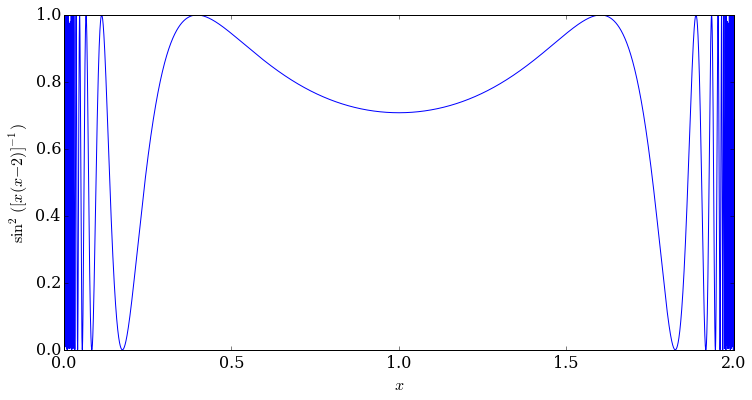

In [12]:
x = numpy.linspace(0.0, 2.0, 10000)
pyplot.plot(x, f(x))
pyplot.xlabel(r"$x$")
pyplot.ylabel(r"$\sin^2([x(x-2)]^{-1})$");

We see that as the function oscillates *infinitely often*, integrating this with standard methods is going to be very inaccurate.

However, we note that the function is bounded, so the integral (given by the shaded area below) must itself be bounded - less than the total area in the plot, which is $2$ in this case.

/Users/ajs3g11/anaconda/envs/python34/lib/python3.4/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in true_divide
  from ipykernel import kernelapp as app
/Users/ajs3g11/anaconda/envs/python34/lib/python3.4/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in sin
  from ipykernel import kernelapp as app


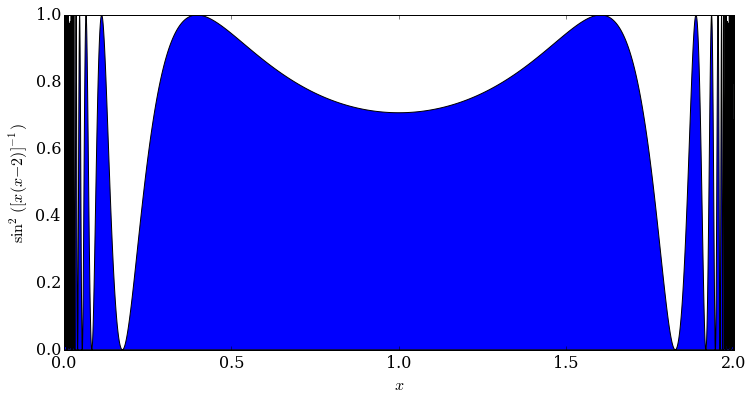

In [13]:
pyplot.fill_between(x, f(x))
pyplot.xlabel(r"$x$")
pyplot.ylabel(r"$\sin^2([x(x-2)]^{-1})$");

So if we scattered (using a *uniform* random distribution) a large number of points within this box, the fraction of them falling *below* the curve is approximately the integral we want to compute, divided by the area of the box:

$$
\begin{equation}
  I = \int_a^b f(x) \, dx \quad \implies \quad I \simeq \frac{k A}{N}
\end{equation}
$$

where $N$ is the total number of points considered, $k$ is the number falling below the curve, and $A$ is the area of the box. We can choose the box, but we need $y \in [\min_{x \in [a, b]} (f(x)), \max_{x \in [a, b]} (f(x))] = [c, d]$, giving $A = (d-c)(b-a)$.

So let's apply this technique to the function above, where the box in $y$ is $[0,1]$.

In [24]:
def mc_integrate(f, domain_x, domain_y, N = 10000):
    """
    Monte Carlo integration function: to be completed. Result, for the given f, should be around 1.46.
    """
    import numpy.random
    domain_xrange = (domain_x[1]-domain_x[0])
    domain_yrange = (domain_y[1]-domain_y[0])
    randomXArray = numpy.random.random(N) * (domain_xrange + domain_x[0])
    randomYArray = numpy.random.random(N) * (domain_yrange + domain_y[0])
    funcValuesArray = f(randomXArray)
    #funcValuesArray = numpy.array([f(x) for x in randomXArray])
    #print(f(2))
    #print(randomXArray, randomYArray, funcValuesArray)
    boolArray = randomYArray <= funcValuesArray
    Hits = sum(boolArray)
    #print(randomXArray, randomYArray, funcValuesArray, boolArray, Hits)
    I=(Hits*domain_xrange*domain_yrange)/N
    return I

In [31]:
mc_integrate(lambda x: x**3, (0,2), (0,8), 1000000)

4.0000640000000001

In [27]:
mc_integrate(f, (0,2), (0,1), 1000)

1.472

### Accuracy

To check the accuracy of the method, let's apply this to calculate $\pi$.

The area of a circle of radius $2$ is $4\pi$, so the area of the *quarter* circle in $x, y \in [0, 2]$ is just $\pi$:

$$
\begin{equation}
  \pi = \int_0^2 \sqrt{4 - x^2} \, dx.
\end{equation}
$$

Check the convergence of the Monte Carlo integration with $N$. (I suggest using $N = 100 \times 2^i$ for $i = 0, \dots, 19$; you should find the error scales roughly as $N^{-1/2}$)

-0.49050472521 1.10301684216


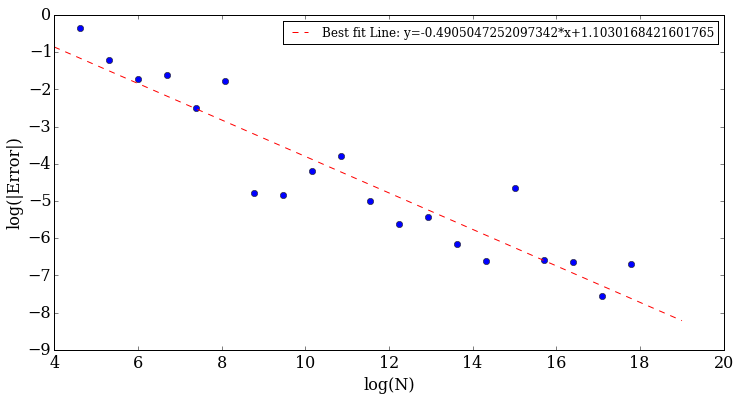

In [16]:
def g(x):
    return (4-x**2)**0.5

Nlist = []
PiList = []

import matplotlib.pyplot as mplot

for i in range(0,20):
    #print(i, mc_integrate(g, (0,2), (0,8), N = 100*2**i))
    Nlist.append(100*2**i)
    PiList.append(mc_integrate(g, (0,2), (0,8), N = 100*2**i))

NlogList = []
abserrlogList = []

for i in range(len(Nlist)):
    NlogList.append(numpy.log(Nlist[i]))
    absError = abs(numpy.pi-PiList[i])
    abserrlogList.append(numpy.log(absError))

(p1, p0) = numpy.polyfit(NlogList, abserrlogList, 1) # y = p1*x + p0

print(p1, p0)

def fittedLine(x):
    return p1*x+p0
    
def create_plot_data(f, xmin, xmax, n):
    """Takes xmin, a min value of x, and xmax, a max value of x\n
    and creates a sequence xs, with values between xmin and xmax\n
    inclusive, with n elements. It also creates a sequence ys\n
    with the values of the function f at the corresponding\n
    values in the sequence xs. It then returns a tuple containing\n
    these 2 seqeuences i.e. (xs, ys)"""
    xsArray = numpy.linspace(start=xmin, stop=xmax, num=n)
    ysArray = numpy.zeros(n)
    i = 0
    for element in numpy.nditer(xsArray):
        #       print element
        ysArray[i] = f(element)
        i += 1
    return (list(xsArray), list(ysArray))

(xFit, yFit) = create_plot_data(fittedLine, 4, 19, 5)

#print(xyFit)
#print(NlogList, abserrlogList)    
    
mplot.clf()
plot1 = mplot.plot(NlogList, abserrlogList, 'bo', label='')
plot2 = mplot.plot(xFit, yFit, '--r', label='Best fit Line: y={}*x+{}'.format(p1,p0))
mplot.xlabel("log(N)")
mplot.ylabel("log(|Error|)")
mplot.legend(prop={'size':12})
mplot.show()

## Mean Value Method

Monte Carlo integration is pretty inaccurate, as seen above: it converges slowly, and has poor accuracy at all $N$. An alternative is the *mean value* method, where we note that *by definition* the average value of $f$ over the interval $[a, b]$ is precisely the integral multiplied by the width of the interval.

Hence we can just choose our $N$ random points in $x$ as above, but now just compute

$$
\begin{equation}
  I \simeq \frac{b-a}{N} \sum_{i=1}^N f(x_i).
\end{equation}
$$

In [17]:
def mv_integrate(f, domain_x, N = 10000):
    """
    Mean value Monte Carlo integration: to be completed
    """
    import numpy.random
    a = domain_x[0]
    b = domain_x[1]
    domain_xrange = (domain_x[1]-domain_x[0])
    xArray = numpy.random.random(N) * (domain_xrange + domain_x[0])
    funcArray = f(xArray)
    sum_ = sum(funcArray)
    I = ((b-a)/N)*sum_
    return I

Let's look at the accuracy of this method again applied to computing $\pi$.

In [18]:
def g(x):
    return (4-x**2)**0.5

mv_integrate(g, (0, 2), 10000000)

3.1411219174552816

-0.556265959999 0.14627381763


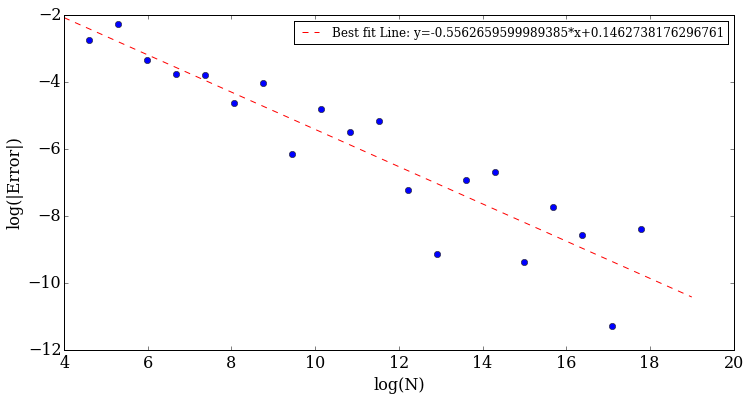

In [23]:
Nlist2 = []
PiList2 = []

import matplotlib.pyplot as mplot

for i in range(0,20):
    #print(i, mv_integrate(g, (0,2), (0,8), N = 100*2**i))
    Nlist2.append(100*2**i)
    PiList2.append(mv_integrate(g, (0,2), N = 100*2**i))

NlogList2 = []
abserrlogList2 = []

for i in range(len(Nlist2)):
    NlogList2.append(numpy.log(Nlist2[i]))
    absError2 = abs(numpy.pi-PiList2[i])
    abserrlogList2.append(numpy.log(absError2))

(p1_2, p0_2) = numpy.polyfit(NlogList2, abserrlogList2, 1) # y = p1*x + p0

print(p1_2, p0_2)

def fittedLine_2(x):
    return p1_2*x+p0_2

(xFit2, yFit2) = create_plot_data(fittedLine_2, 4, 19, 5)

#print(xyFit)
#print(NlogList, abserrlogList)    
    
mplot.clf()
plot1_2 = mplot.plot(NlogList2, abserrlogList2, 'bo', label='')
plot2_2 = mplot.plot(xFit2, yFit2, '--r', label='Best fit Line: y={}*x+{}'.format(p1_2,p0_2))
mplot.xlabel("log(N)")
mplot.ylabel("log(|Error|)")
mplot.legend(prop={'size':12})
mplot.show()

The convergence *rate* is the same (only roughly, typically), but the Mean Value method is *expected* to be better in terms of its absolute error.

### Dimensionality

Compared to standard integration methods (Gauss quadrature, Simpson's rule, etc) the convergence rate for Monte Carlo methods is very slow. However, there is one crucial advantage: as you change dimension, the amount of calculation required is *unchanged*, whereas for standard methods it grows geometrically with the dimension.

Try to compute the volume of an $n$-dimensional unit *hypersphere*, which is the object in $\mathbb{R}^n$ such that

$$
\begin{equation}
  \sum_{i=1}^n x_i^2 \le 1.
\end{equation}
$$

The volume of the hypersphere [can be found in closed form](http://en.wikipedia.org/wiki/Volume_of_an_n-ball#The_volume), but can rapidly be computed using the Monte Carlo method above, by counting the $k$ points that randomly fall within the hypersphere and using the standard formula $I \simeq V k / N$.

In [196]:
def mc_integrate_multid(f, domain, N = 10000):
    """
    Monte Carlo integration in arbitrary dimensions (read from the size of the domain): to be completed
    """
    import numpy.random
    dimensionality = len(domain) #dimensionality of the hypersphere - determined by the length of the domain list
    
    #initialisation of lists/arrays
    domain_range = numpy.zeros(shape=(dimensionality, 1))
    funcValuesArray = numpy.zeros(N)

    for i in range(0, dimensionality):
        domain_range[i] = (domain[i][1]-domain[i][0])  #calculates domain range for each dimension


    for i in range(0, N):
        XYZ = []
        for j in range(0, dimensionality):
            XYZ.append(float(numpy.random.rand() * (domain_range[j] + domain[j][0]))) 
        #print XYZ
        funcValuesArray[i] = f(numpy.array(XYZ)) #creates an N element list of function values at random points (x, y, z ...) 
        #print(funcValuesArray[i])
    #print(funcValuesArray)

    
    zeroes = numpy.zeros(N)
    boolArray = funcValuesArray <= zeroes  #compares the array of function values with an of array of zeroes
    Hits = sum(boolArray) #sums the number of hits (i.e. points inside or on the surface of the hypersphere)
    hyperVolume = 1 #initialises hypervolume
    for i in range(0, dimensionality):
        hyperVolume *= domain_range[i] #calculates hypervolume of hypercuboid domain
        
    I = (Hits*hyperVolume)/N #calculates integral's value
    return float(I)#*2**dimensionality

def MakeHyperSphereOfRadiusR(R):
    def HyperSphere(ArrayOfDimensionalVariables):
        """defines a hypersphere of radius R with variables in the Array e.g. for a 3d
        sphere with radius R pass an array [x, y, z] and the radius R. The function returns a value
        which is <= 0 if the value is inside the function and >0 if it's outside the function"""
        #print(ArrayOfDimensionalVariables)
        return sum(ArrayOfDimensionalVariables**2)-R**2  #e.g. for 3d sphere for points inside or on the surface of the sphere x**2+y**2+z**2-R**2 will be < or = to 0
    return HyperSphere
    

In [197]:
HyperS_1 = MakeHyperSphereOfRadiusR(1)
domainD = []
dimensionList = []
integralList = []
for i in range(0,10):
    domainD.append([-1,1])
    dimensionList.append(i)
    integralList.append(mc_integrate_multid(HyperS_1, domainD, N = 1000000))
    

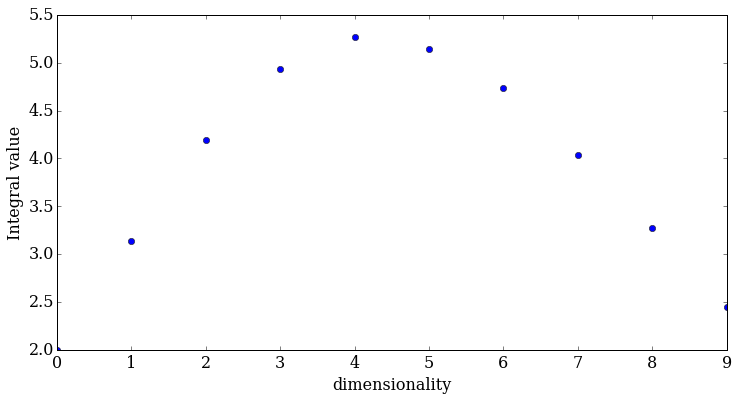

In [199]:
mplot.clf()
plot1_3 = mplot.plot(dimensionList, integralList, 'bo', label='')
#plot2_2 = mplot.plot(xFit2, yFit2, '--r', label='Best fit Line: y={}*x+{}'.format(p1_2,p0_2))
mplot.xlabel("dimensionality")
mplot.ylabel("Integral value")
#mplot.legend(prop={'size':12})
mplot.show()

This is a plot of my calculated values of the Integral

In [200]:
from scipy import special

In [201]:
def volume_hypersphere(ndim=3):
    return numpy.pi**(float(ndim)/2.0) / special.gamma(float(ndim)/2.0 + 1.0)*1**ndim

In [202]:
volume_hypersphere(ndim=5)

5.263789013914324

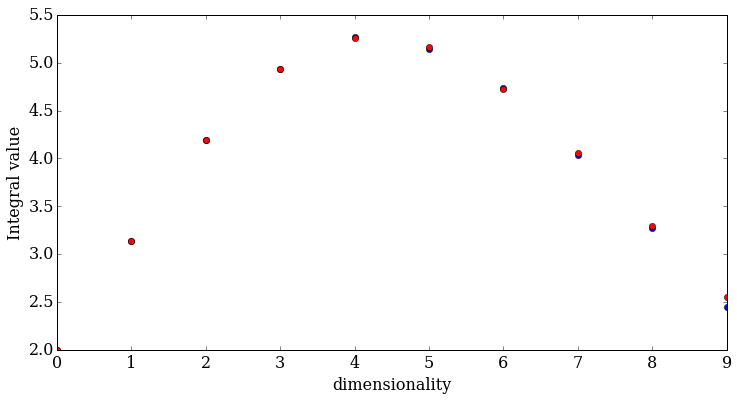

In [203]:
volList = []
for i in range(0,10):
    volList.append(volume_hypersphere(ndim=i+1))
    
mplot.clf()
plot1_3 = mplot.plot(dimensionList, integralList, 'bo', label='')
plot2_2 = mplot.plot(dimensionList, volList, 'ro', label='')
mplot.xlabel("dimensionality")
mplot.ylabel("Integral value")
#mplot.legend(prop={'size':12})
mplot.show()



This is a plot of my calculated values of the integral in blue and the actual values in red

In [204]:
print(volList, "\n\n" ,integralList)

[2.0, 3.1415926535897931, 4.1887902047863914, 4.934802200544679, 5.263789013914324, 5.1677127800499694, 4.7247659703314007, 4.0587121264167676, 3.2985089027387064, 2.5501640398773451] 

 [2.0, 3.140672, 4.18868, 4.932768, 5.2712, 5.149056, 4.740096, 4.038656, 3.268096, 2.44736]


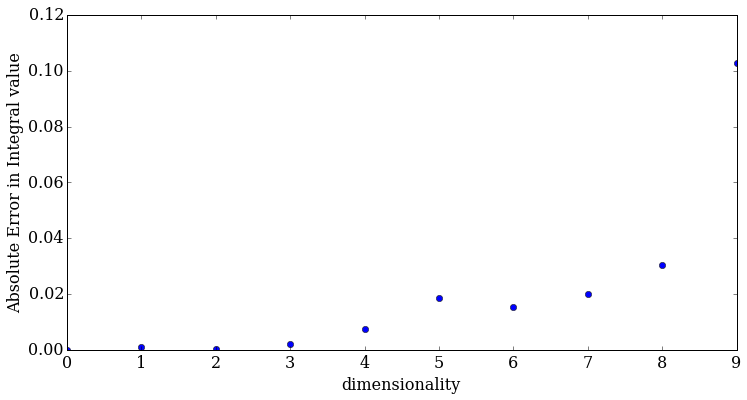

In [205]:
volArray = numpy.array(volList)
integralArray = numpy.array(integralList)

errorArray = abs(volArray-integralArray)



mplot.clf()
plot1_3 = mplot.plot(dimensionList, errorArray, 'bo', label='')
#plot2_2 = mplot.plot(xFit2, yFit2, '--r', label='Best fit Line: y={}*x+{}'.format(p1_2,p0_2))
mplot.xlabel("dimensionality")
mplot.ylabel("Absolute Error in Integral value")
#mplot.legend(prop={'size':12})
mplot.show()

This is a plot of the error of my calculated values, thier deviance from the actual values

Lets try with domains from -2 to 2 to make sure the domain has little effect on the result. It increased the error (makes sence since it is less likely for the random points to fall in the hypersphere => I am trying using 10 million points as opposed to 1 million.

In [209]:
HyperS_1 = MakeHyperSphereOfRadiusR(1)
domainD = []
dimensionList = []
integralList = []
for i in range(0,10):
    domainD.append([-2,2])
    dimensionList.append(i)
    integralList.append(mc_integrate_multid(HyperS_1, domainD, N = 10000000))
    
 

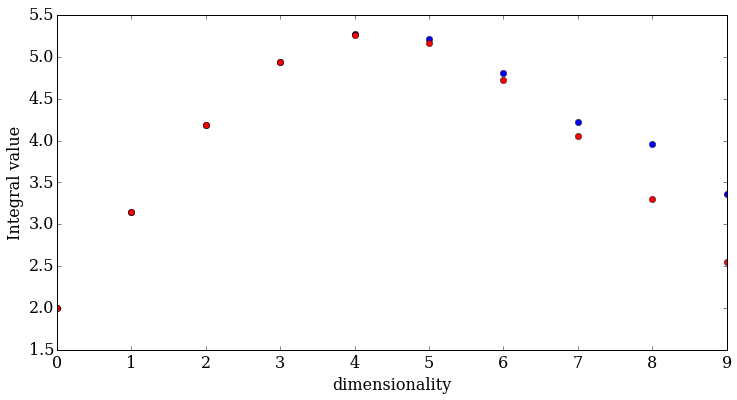

In [210]:
volList = []
for i in range(0,10):
    volList.append(volume_hypersphere(ndim=i+1))
    
mplot.clf()
plot1_3 = mplot.plot(dimensionList, integralList, 'bo', label='')
plot2_2 = mplot.plot(dimensionList, volList, 'ro', label='')
mplot.xlabel("dimensionality")
mplot.ylabel("Integral value")
#mplot.legend(prop={'size':12})
mplot.show()

This is a plot of my calculated values of the integral in blue and the actual values in red. This plot however uses the domain -2 to 2 in each dimension but calculated for the same unit hypersphere, the values diverge at higher dimensionality, why?

Now let us repeat this across multiple dimensions.

The errors clearly vary over a range, but the convergence remains roughly as $N^{-1/2}$ independent of the dimension; using other techniques such as Gauss quadrature would see the points required scaling geometrically with the dimension.

## Importance sampling

Consider the integral (which arises, for example, in the theory of Fermi gases)

$$
\begin{equation}
  I = \int_0^1 \frac{x^{-1/2}}{e^x + 1} \, dx.
\end{equation}
$$

This has a finite value, but the integrand diverges as $x \to 0$. This *may* cause a problem for Monte Carlo integration when a single value may give a spuriously large contribution to the sum.

We can get around this by changing the points at which the integrand is sampled. Choose a *weighting* function $w(x)$. Then a weighted average of any function $g(x)$ can be

$$
\begin{equation}
  <g>_w = \frac{\int_a^b w(x) g(x) \, dx}{\int_a^b w(x) \, dx}.
\end{equation}
$$

As our integral is

$$
\begin{equation}
  I = \int_a^b f(x) \, dx
\end{equation}
$$

we can, by setting $g(x) = f(x) / w(x)$ get

$$
\begin{equation}
  I = \int_a^b f(x) \, dx = \left< \frac{f(x)}{w(x)} \right>_w \int_a^b w(x) \, dx.
\end{equation}
$$

This gives

$$
\begin{equation}
  I \simeq \frac{1}{N} \sum_{i=1}^N \frac{f(x_i)}{w(x_i)} \int_a^b w(x) \, dx,
\end{equation}
$$

where the points $x_i$ are now chosen from a *non-uniform* probability distribution with pdf

$$
\begin{equation}
  p(x) = \frac{w(x)}{\int_a^b w(x) \, dx}.
\end{equation}
$$

This is a generalization of the mean value method - we clearly recover the mean value method when the weighting function $w(x) \equiv 1$. A careful choice of the weighting function can mitigate problematic regions of the integrand; e.g., in the example above we could choose $w(x) = x^{-1/2}$, giving $p(x) = x^{-1/2}/2$.

So, let's try to solve the integral above. The expected solution is around 0.84.

In [313]:
def ic_integrate(f, domain_x, N = 10000):
    """
    Mean value Monte Carlo integration: to be completed
    Using w(x)=x**(-0.5)
    """
    import numpy.random
    def w(x):
        return x**(-0.5)
    
    a = domain_x[0]
    b = domain_x[1]
    lower_limit = (a**0.5)
    upper_limit = (b**0.5)
    domain_yrange = upper_limit-lower_limit
    yArray = numpy.random.random(N) * (domain_yrange + lower_limit) #y = unformly distributed random no.s
    xArray = yArray**(2)  #x = random numbers distributed with the probability distribution p(x)=x**(-0.5)/2
    #print(xArray)
    funcOverWeightingArray = f(xArray)/w(xArray)
    sum_ = sum(funcOverWeightingArray)
    #print(sum_, N, domain_x[0], domain_x[1])
    I = (sum_/N)*2*(b**0.5-a**0.5)
    return I

In [314]:
def f_fermi(x):
    return x**(-0.5)/(numpy.exp(x)+1)

ic_integrate(f_fermi, [0,1], N=1000000)

0.8387839715366322

This is the expected value